In [6]:
import sys
from glob import glob

import time
import zarr
import h5py
import pygrib
import pickle
import pandas as pd
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

In [7]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from mpl_toolkits.basemap import Basemap

In [10]:
def domain_aggregate_2d(data, gap, method='mean'):
    
    assert gap >= 2
    assert method in ['mean', 'min', 'max']
    
    grid_shape = data.shape
    Nx = grid_shape[0] // gap + 1
    Ny = grid_shape[1] // gap + 1
    
    edgex = gap*Nx
    edgey = gap*Ny
    
    if (edgex > grid_shape[0]+1):
        Nx -= 1
    
    if (edgey > grid_shape[1]+1):
        Ny -= 1
        
    out = np.empty((Nx, Ny))
    
    for ix in range(Nx):
        for iy in range(Ny):
            if method == 'mean':
                out[ix, iy] = np.nanmean(data[ix*gap:(ix+1)*gap, iy*gap:(iy+1)*gap])
            elif method == 'min':
                out[ix, iy] = np.nanmin(data[ix*gap:(ix+1)*gap, iy*gap:(iy+1)*gap])
            else:
                out[ix, iy] = np.nanmax(data[ix*gap:(ix+1)*gap, iy*gap:(iy+1)*gap])
    return out

In [ ]:
# with pygrib.open(HRRR_dir+'fcst12hr/HRRR.20220105.natf12.grib2') as grbio:    
#     var = grbio[1]
#     lat_hrrr, lon_hrrr = var.latlons()

In [37]:
# test = pd.read_pickle('/glade/work/ksha/NCAR/usmask_hrrrv3.pk')
# land_mask = test.reshape(lon_3km.shape)

# # lon = domain_aggregate_2d(lon_hrrr, gap=24) # grid spacing = 24*3 = 72 km
# # lat = domain_aggregate_2d(lat_hrrr, gap=24)

# land_mask_72km = domain_aggregate_2d(land_mask, gap=24)
# land_mask_72km = land_mask_72km > 0.5

In [ ]:
# with nc.Dataset('/glade/scratch/ksha/BACKUP/ETOPO1_Ice_g_gmt4.grd', 'r') as ncio:
#     x = ncio['x'][2500:7400]
#     y = ncio['y'][6500:9000]
#     z = ncio['z'][6500:9000, 2500:7400]
    
# long, lat = np.meshgrid(x, y)
# elev = du.interp2d_wraper(long, lat, z, lon_3km, lat_3km, method='linear')

In [ ]:
# save_dir = '/glade/work/ksha/NCAR/'
# tuple_save = (lon_72km, lat_72km, lon_3km, lat_3km, elev)
# label_save = ['lon_72km', 'lat_72km', 'lon_3km', 'lat_3km', 'elev_3km']
# #du.save_hdf5(tuple_save, label_save, save_dir, 'HRRR_domain.hdf')

# save_dir = '/glade/work/ksha/NCAR/'
# tuple_save = (lon_72km, lat_72km, lon_3km, lat_3km, land_mask, land_mask_72km, elev_3km)
# label_save = ['lon_72km', 'lat_72km', 'lon_3km', 'lat_3km', 'land_mask_3km', 'land_mask_72km', 'elev_3km']
# #du.save_hdf5(tuple_save, label_save, save_dir, 'HRRR_domain.hdf')

In [45]:
# with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
#     lon_72km = h5io['lon_72km'][...]
#     lat_72km = h5io['lat_72km'][...]
#     lon_3km = h5io['lon_3km'][...]
#     lat_3km = h5io['lat_3km'][...]
#     elev_3km = h5io['elev_3km'][...]

In [18]:
awips_proj = Basemap(projection='lcc', 
                     llcrnrlon=-133.459, 
                     llcrnrlat=12.19, 
                     urcrnrlon=-49.38641, 
                     urcrnrlat=57.2894, 
                     lat_1=25.0, lat_2=25.0, lon_0=-95)

lon_80km, lat_80km, distx_80km, disty_80km = awips_proj.makegrid(93, 65, returnxy=True)


In [13]:
lons.shape

(65, 93)

In [17]:
with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
    print(h5io.keys())
    lon_72km = h5io['lon_72km'][...]
    lat_72km = h5io['lat_72km'][...]
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]
    elev_3km = h5io['elev_3km'][...]
    land_mask_3km = h5io['land_mask_3km'][...]
    land_mask_72km = h5io['land_mask_72km'][...]

<KeysViewHDF5 ['elev_3km', 'land_mask_3km', 'land_mask_72km', 'lat_3km', 'lat_72km', 'lon_3km', 'lon_72km']>


In [19]:
land_mask_80km = du.interp2d_wraper(lon_3km, lat_3km, land_mask_3km, lon_80km, lat_80km, method='linear')

In [22]:
land_mask_80km = land_mask_80km > 0.5

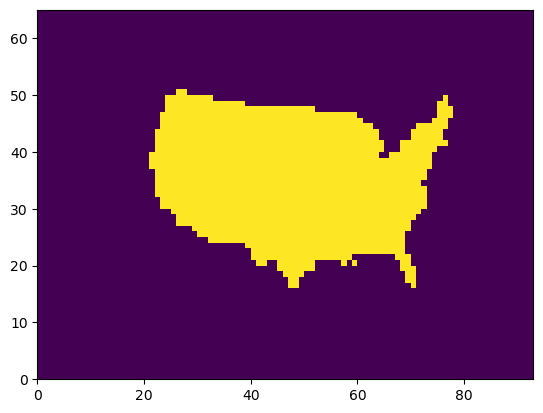

In [23]:
plt.pcolormesh(land_mask_80km)

In [28]:
# save_dir = '/glade/work/ksha/NCAR/'

# tuple_save = (lon_80km, lat_80km, distx_80km, disty_80km, 
#               lon_72km, lat_72km, 
#               lon_3km, lat_3km, 
#               land_mask_3km, land_mask_72km, land_mask_80km, elev_3km)

# label_save = ['lon_80km', 'lat_80km', 'distx_80km', 'disty_80km', 
#               'lon_72km', 'lat_72km', 
#               'lon_3km', 'lat_3km', 
#               'land_mask_3km', 'land_mask_72km', 'land_mask_80km', 'elev_3km']

# du.save_hdf5(tuple_save, label_save, save_dir, 'HRRR_domain.hdf')

Save to /glade/work/ksha/NCAR/HRRR_domain.hdf


In [27]:
with h5py.File(save_dir+'HRRR_domain_backup.hdf', 'r') as h5io:
    print(h5io.keys())
    lon_80km = h5io['lon_80km'][...]
    lat_80km = h5io['lat_80km'][...]
    lon_72km = h5io['lon_72km'][...]
    lat_72km = h5io['lat_72km'][...]
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]
    elev_3km = h5io['elev_3km'][...]
    land_mask_3km = h5io['land_mask_3km'][...]
    land_mask_72km = h5io['land_mask_72km'][...]
    land_mask_80km = h5io['land_mask_80km'][...]

<KeysViewHDF5 ['distx_80km', 'disty_80km', 'elev_3km', 'land_mask_3km', 'land_mask_72km', 'land_mask_80km', 'lat_3km', 'lat_72km', 'lat_80km', 'lon_3km', 'lon_72km', 'lon_80km']>
